In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


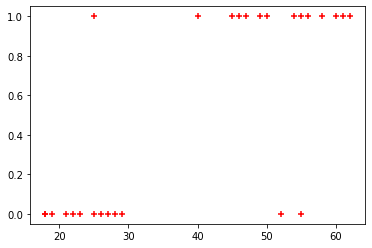

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [6]:
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

X_test



,age
21,26
20,21
25,54
1,25
10,18
22,40


In [18]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
model.score(X_test,y_test)

0.8033186505174965

In [21]:
y_predicted = model.predict(X_test)

model.predict(X_test)

array([0.18360058, 0.14003724, 0.61923398, 0.03112889, 0.9023957 ,
       0.70636067])

In [23]:
model.score(X_test,y_test)


0.8033186505174965

###### model.coef_ indicates value of m in y=m*x + b equation

In [24]:
model.coef_

array([0.02178167])

#### model.intercept_ indicates value of b in y=m*x + b equation

In [25]:
model.intercept_

-0.36094118094080085

###### Lets defined sigmoid function now and do the math with hand

In [26]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [27]:
def prediction_function(age):
    z=0.0042* age -1.53
    y=sigmoid(z)
    return y

In [28]:
age=35
prediction_function(age)

0.20052761875201436

In [29]:


age = 43
prediction_function(age)



0.20596848176932242

##### Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

    Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    Plot bar charts showing impact of employee salaries on retention
    Plot bar charts showing corelation between department and employee retention
    Now build logistic regression model using variables that were narrowed down in step 1
    Measure the accuracy of the model



In [74]:
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [75]:
salary=df.salary
salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

###### Data exploration and visualization


In [107]:
left = df[df.left==1]
left.shape

(3571, 10)

In [108]:
retained = df[df.left==0]
left.shape

(3571, 10)

###### Average numbers for all columns

In [109]:
df.groupby('left').mean()


C:\Users\HP\AppData\Local\Temp/ipykernel_3160/722136348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [110]:
print(df.columns)  # List all columns in your DataFrame

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


###### From above table we can draw following conclusions,

    **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
    **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
    **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

<AxesSubplot:xlabel='salary'>

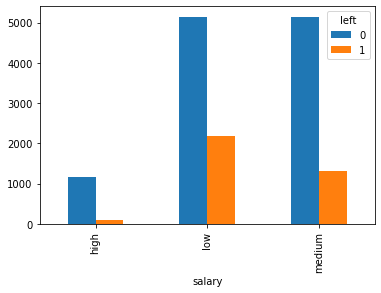

In [111]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

###### Department wise employee retention rate

###### pd.crosstab(df.Department,df.left).plot(kind='bar')

#### From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis
From the data analysis so far we can conclude that we will use following variables as independant variables in our model

    **Satisfaction Level**
    **Average Monthly Hours**
    **Promotion Last 5 Years**
    **Salary**


In [112]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


###### Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. 
Check my one hot encoding tutorial to understand purpose behind dummy variables.


In [113]:
salary_dummies=pd.get_dummies(subdf.salary,prefix='salary')

In [114]:


df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')



In [115]:
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [116]:
X = df_with_dummies
X.head()



,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [126]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [127]:
y=df.left

In [128]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)



In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [130]:
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [132]:
model.score(X_test,y_test)

0.7725714285714286